In [12]:
import os
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
Updating files:  31% (45/142)
Updating files:  32% (46/142)
Updating files:  33% (47/142)
Updating files:  34% (49/142)
Updating files:  35% (50/142)
Updating files:  36% (52/142)
Updating files:  37% (53/142)
Updating files:  38% (54/142)
Updating files:  39% (56/142)
Updating files:  40% (57/142)
Updating files:  41% (59/142)
Updating files:  42% (60/142)
Updating files:  43% (62/142)
Updating files:  44% (63/142)
Updating files:  45% (64/142)
Updating files:  46% (66/142)
Updating files:  47% (67/142)
Updating files:  48% (69/142)
Updating files:  49% (70/142)
Updating files:  50% (71/142)
Updating files:  51% (73/142)
Updating files:  52% (74/142)
Updating files:  53% (76/142)
Updating files:  54% (77/142)
Updating files:  55% (79/142)
Updating files:  56% (80/142)
Updating files:  57% (81/142)
Updating files:  58% (83/142)
Updating files:  59% (84/142)
Updating files:  60% (86/142)
Updating files:  61% (87/142)
Updating files:  62% (89/142)
Updating files:

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True)

Using cache found in C:\Users\SHOCKER/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-30 Python-3.9.0 torch-2.0.1+cpu CPU

100%|██████████████████████████████████████████████████████████████████████████████| 3.87M/3.87M [00:04<00:00, 933kB/s]

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


In [8]:
img = 'augmented/images/maksssksksss100_0.jpg'

results = model(img)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 400x400 4 persons
Speed: 88.4ms pre-process, 463.5ms inference, 5.7ms NMS per image at shape (1, 3, 640, 640)

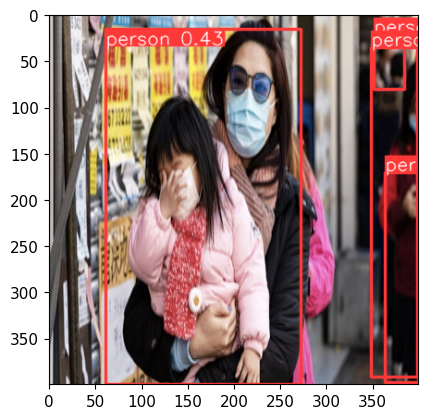

In [9]:
%matplotlib inline
plt.imshow((results.render()[0]))
plt.show()

In [41]:
# written to convert the already made json format to the yolo format
'''labels_path = 'augmented/annotations'
new_labels_path = 'augmented/labels'
class_map = {'with_mask':0, 'without_mask':1, 'mask_weared_incorrect':2}

for files in os.listdir(labels_path):
    img = cv2.imread(f'augmented/images/{files.split(".")[0]}.jpg')
    width, height, channel = np.shape(img)
    with open(f'{labels_path}/{files}', 'r') as f:
        file = json.load(f)
    bboxes = file['bboxes']
    
    for i in range(len(bboxes)):
        class_lab = class_map[file['class'][i]]
        x_center_norm = (((bboxes[i][0] + bboxes[i][2]) / 2) / width)
        y_center_norm = (((bboxes[i][1] + bboxes[i][3]) / 2) / height)
        width_norm = ((bboxes[i][2] - bboxes[i][0]) / width)
        height_norm = ((bboxes[i][3] - bboxes[i][1]) / height)
        with open(f'{new_labels_path}/{files.split(".")[0]}.txt', 'a') as c:
            c.write(f'{class_lab} {x_center_norm} {y_center_norm} {width_norm} {height_norm}\n')'''

In [42]:
from ultralytics import YOLO

In [52]:
model = YOLO('yolov5nu.pt')

In [62]:
model.train(data='dataset.yaml', epochs=100, imgsz=350)

New https://pypi.org/project/ultralytics/8.0.182 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.124  Python-3.9.0 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov5nu.pt, data=dataset.yaml, epochs=100, patience=50, batch=16, imgsz=350, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:40
                   all        485       2080       0.71      0.547      0.609      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100         0G      1.239     0.8662      1.021         23        352: 100%|██████████| 217/217 [27:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:39
                   all        485       2080      0.632      0.553      0.582       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/100         0G      1.237     0.8519      1.014         25        352: 100%|██████████| 217/217 [27:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:38
                   all        485       2080      0.796      0.5

KeyboardInterrupt: 

In [88]:
img = 'augmented/val/images/maksssksksss711_0.jpg'

results = model(img)


WARNING  NMS time limit 0.550s exceeded
image 1/1 C:\Users\SHOCKER\torch_projects\computer_vision\face_mask_detection\augmented\val\images\maksssksksss711_0.jpg: 640x640 8 with_masks, 4425.4ms
Speed: 2806.5ms preprocess, 4425.4ms inference, 963.2ms postprocess per image at shape (1, 3, 640, 640)


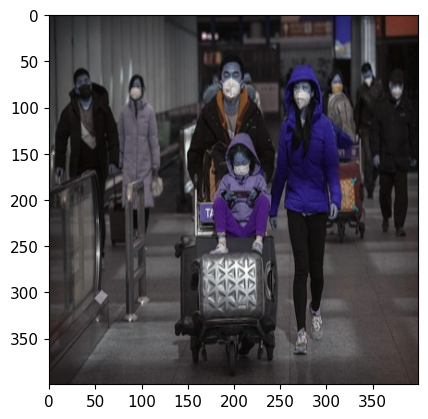

In [89]:
%matplotlib inline
plt.imshow(results[0].orig_img)
plt.show()

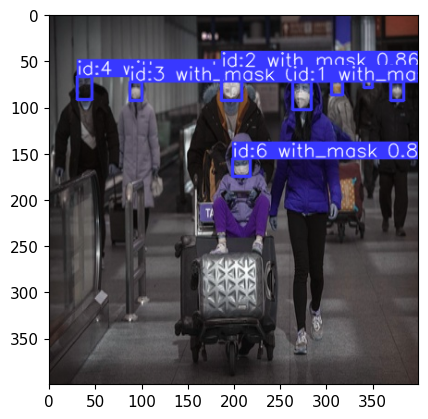

In [90]:
plt.imshow(results[0].plot())

In [ ]:
pip install -U ultralytics